# 0.引入所有需要的库和数据集
- 包含word2vec模型、pandas、numpy和gensim
- 其中Gensim是一款开源的第三方Python工具包，用于从原始的非结构化的文本中，无监督地学习到文本隐层的主题向量表达。它支持包括TF-IDF，LSA，LDA，和word2vec在内的多种主题模型算法

In [7]:
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn import decomposition, ensemble
from gensim.models import Word2Vec
import pandas as pd
import numpy as np
import gensim
import pandas,  numpy, textblob, string #xgboost,
#from keras.preprocessing import text, sequence
#from keras import layers, models, optimizers

In [3]:
import sqlite3
conn = sqlite3.connect("data/database/texts.db")

print ('Opened database successfully')

Opened database successfully


In [4]:
c = conn.cursor()

ci_data=[]
cursor = c.execute("SELECT * from ci order by id asc limit 4000")
#cursor = c.execute("SELECT * from ci order by id")
for row in cursor:
    ci_data.append(row)
#print("读取的词数据样例：")
#print(ci_data[-2:])

poet_data = []
cursor=c.execute("SELECT * FROM poet order by id asc limit 4000")
#cursor = c.execute("SELECT * from poet order by id")
for row in cursor:
    poet_data.append(row)
#print("\n读取的诗数据样例：")
#print(poet_data[-2:])

classical_data = []
cursor=c.execute("SELECT * FROM classical order by id asc limit 4000")
#cursor = c.execute("SELECT * from classical order by id")
for row in cursor:
    classical_data.append(row)
#print("\n读取的文言文数据样例：")
#print(classical_data[-2:])

journal_data = []
cursor=c.execute("SELECT * FROM journal order by id asc limit 4000")
#cursor = c.execute("SELECT * from journal order by id")
for row in cursor:
    journal_data.append(row)
#print("\n读取的期刊数据样例：")
#print(journal_data[:2])
    
news_data = []
cursor=c.execute("SELECT * FROM news order by id asc limit 4000")
#cursor=c.execute("SELECT * FROM news")
for row in cursor:
    news_data.append(row)
#print("\n读取的新闻数据样例：")
#print(news_data[:2])

print("add successfully")

add successfully


In [49]:
data = ci_data + poet_data + classical_data + journal_data + news_data

data_list = []
for line in data:
    data_list.append(list(line))

print(data_list[6000])
for item in data_list:
    item[1] = ' '.join(list(item[1]))
for i in range(len(data_list)):
        data_list[i].remove(data_list[i][3])
        data_list[i].remove(data_list[i][0])
print(data_list[6000])
print(len(data_list))

[40002209, '中兴曾作故人看，抗节唯怜七里滩。 枯枿卧沙疑野艇，丛篁生岸忆长竿。 天边旧迹星辰动，江上余基水石寒。 应笑渭滨周吕望，白头因猎从和銮。 ', 'poet', 'd1fcb4d4-c756-418d-927d-b77c92901a98']
['中 兴 曾 作 故 人 看 ， 抗 节 唯 怜 七 里 滩 。   枯 枿 卧 沙 疑 野 艇 ， 丛 篁 生 岸 忆 长 竿 。   天 边 旧 迹 星 辰 动 ， 江 上 余 基 水 石 寒 。   应 笑 渭 滨 周 吕 望 ， 白 头 因 猎 从 和 銮 。  ', 'poet']
20000


In [6]:
train_data=[]
train_target=[]
for i in range(0,len(data)):
    train_data.append(data[i][1])
    train_target.append(data[i][2])
print(train_data[:3])
print(train_target[15000:15003])

['气和玉烛，睿化著鸿明。 缇管一阳生。 郊盛礼燔柴毕，旋轸凤凰城。 森罗仪卫振华缨。 载路溢欢声。 皇图大业超前古，垂象泰阶平。 岁时丰衍，九土乐升平。 睹寰海澄清。 道高尧舜垂衣治，日月并文明。 嘉禾甘露登歌荐，云物焕祥经。 兢兢惕惕持谦德，未许禅云亭。', '严夜警，铜莲漏迟迟。 清禁肃，森陛戟，羽卫俨皇闱。 角声励，钲鼓攸宜。 金管成雅奏，逐吹逶迤。 荐苍璧，郊祀神祗。 属景运纯禧。 京坻丰衍，群材乐育，诸侯述职，盛德服蛮夷。 殊祥萃，九苞丹凤来仪。 膏露降，和气洽，三秀焕灵芝。 鸿猷播，史册相辉。 张四维。 卜世永固丕基。 敷玄化，荡荡无为。 合尧舜文思。 混并寰宇，休牛归马，销金偃革，蹈咏庆昌期。', '承宝运，驯致隆平。 鸿庆被寰瀛。 时清俗阜，治定功成。 遐迩咏由庚。 严郊祀，文物声明。 会天正、星拱奏严更。 布羽仪簪缨。 宸心虔洁，明德播惟馨。 动苍冥。 神降享精诚。 燔柴半，万乘移天仗，肃銮辂旋衡。 千官云拥，群后葵倾。 玉帛旅明庭。 韶荐，金奏谐声。 集休亨。 皇泽浃黎庶，普率洽恩荣。 仰钦元后，睿圣贯三灵。 万邦宁。 景贶福千龄。']
['modern', 'modern', 'modern']


In [8]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(train_data, train_target,test_size=0.3,random_state=0) 

# 2. 数据预处理与格式转化
### （1）构建标签字典
> 标签种类总数为36种，共有52w多个标签

- *list(set())*的功能是:对原列表去重并按从小到大排序。
- labels中存放的是所有的样本，而去重后的labels_type中存放的是词性的所有种类

In [10]:
labels = y_train + y_test
labels_types = list(set(labels))

print(labels_types[:10])
print(labels[:10])
print(len(labels))
print(len(labels_types))

['modern', 'poet', 'classical', 'ci']
['classical', 'classical', 'classical', 'modern', 'modern', 'modern', 'modern', 'ci', 'classical', 'modern']
20000
4


> 构建字典
- update()函数用于将两个字典合并操作，有相同的就覆盖，在此处只是把每个类别和对应出现的次数进行统计

In [11]:
labels_dict = {}
labels_index = {"padded_label" : 0}

for index in range(len(labels_types)):
    label = labels_types[index]
    labels_dict.update({label: labels.count(label)})
    labels_index.update({label: index+1})

np.save('y_labels_index.npy', labels_index)     
print("the count of total labels is : "+ str(len(labels)) + "\nthe number of types of labels is : " + str(len(labels_dict)))

the count of total labels is : 20000
the number of types of labels is : 4


- 输出字典（键：类别；值：出现次数）

In [12]:
def print_inventory(dct):
    print("Items held")
    for item, amount in dct.items():
        print("{:<4}:{}".format(item, amount))

print("Here are the specific types and correspond counts: ")
print_inventory(labels_dict)

Here are the specific types and correspond counts: 
Items held
modern:8000
poet:4000
classical:4000
ci  :4000


---
### （2）切分句子
- 因为要考虑词与词之间的关系，因此要把文本切分成句子

> 在文档中的每个句子之间以空格进行分隔，因此可以根据分辨出的空行来分隔每句话

In [13]:
# 按句对X、y进行拆分
def split_corpus_by_sentence(content):
    cleaned_sentence = []
    split_label = content.isnull()
    last_split_index = 0
    index = 0
    while index < len(content):
        current_word = content[index]
        if split_label[index] == True and len(cleaned_sentence) == 0:
            cleaned_sentence.append(np.array(content[last_split_index:index]))
            last_split_index = index + 1
            index += 1
        elif split_label[index] == True  and len(cleaned_sentence) > 0:
            cleaned_sentence.append(np.array(content[last_split_index:index]))
            last_split_index = index + 1
            index += 1
        else:
            index += 1
    return cleaned_sentence

x_train_sent_split = split_corpus_by_sentence(x_train)
y_train_sent_split = split_corpus_by_sentence(y_train)
x_test_sent_split = split_corpus_by_sentence(x_test)
y_test_sent_split = split_corpus_by_sentence(y_test)

print('以句子进行拆分后的句子为：\n', x_train_sent_split[:2])
print('以句子进行拆分后的句子所对应的词性为：\n', y_train_sent_split[:2])

AttributeError: 'list' object has no attribute 'isnull'

- 进行数据集的拆分，并给出一些句子的词性标注的demo

> 转化成计算机语言，因此要转换成索引（数字表示类别）

- 可以看到类别由前面的string值按照排序后的index值转变成了数字表示

In [16]:
def transfer_label_category_index(origin_labels, labels_types):
    transfered_label = []
    for sentence_labels in origin_labels:
        labels_format_index = [labels_types.index(sentence_labels)]  # 将标签依据字典转化为序号
        transfered_label.append(labels_format_index)
    return transfered_label

y_train_index = transfer_label_category_index(y_train, labels_types)
y_test_index = transfer_label_category_index(y_test, labels_types)

print(y_train_index[:5])

[[2], [2], [2], [0], [0]]


---
### （3）设置定长向量
- 循环神经网络中处理的是定长向量的问题，因此要限定句子的长度
- 本次实验中设置每句长度为100个词，不满100个词的句子剩余部分全填充为0，因此在此处可以把y标签填充到100个词（不满100的话全部填充为0），保证传入的是一个定长向量因此可以进行矩阵计算
---
### （4）构建张量
- np.zeros()：构建全0的张量
> ***三个维度的张量：***
1. 标签的样本数（句子数）
2. 句子的长度（本例中设定的是100）
3. 标签的类别数（36个种类）

> 因此在此处转换成的是三维数组，最低维的代表词性的种类，每个元素是一个词，用这个办法可以把所有y_label转成三维数组表示。
第二个维度表示一个句子中包含的词，第三个维度代表所有句子

> 在此增加了一个标签种类，总的类数增加到37，加的是一个特殊的类，用来表示长度超出100后被略掉的词

---
- 填充张量：判断对应的词性并把相应的位置由0替换成1

In [98]:
MAX_SEQUENCE_LENGTH = 100  #设置每句长度为100个词，不满的全填充为0

# 标签格式转化
# 构建对应（标签样本数，句子长度，标签类别数（37类）形状的张量，值全为0
y_train_index_padded = np.zeros((len(y_train_index), MAX_SEQUENCE_LENGTH, len(labels_types)+1), dtype='float', order='C')
y_test_index_padded = np.zeros((len(y_test_index), MAX_SEQUENCE_LENGTH, len(labels_types)+1), dtype='float', order='C')

# 填充张量
for sentence_labels_index in range(len(y_train_index)):
    for label_index in range(len(y_train_index[sentence_labels_index])):
        if label_index < MAX_SEQUENCE_LENGTH:
            y_train_index_padded[sentence_labels_index, label_index, y_train_index[sentence_labels_index][label_index]+1] = 1
            
    if len(y_train_index[sentence_labels_index]) < MAX_SEQUENCE_LENGTH:
        for label_index in range(len(y_train_index[sentence_labels_index]), MAX_SEQUENCE_LENGTH):
            y_train_index_padded[sentence_labels_index, label_index, 0] = 1

for sentence_labels_index in range(len(y_test_index)):
    for label_index in range(len(y_test_index[sentence_labels_index])):
        if label_index < MAX_SEQUENCE_LENGTH:
            y_test_index_padded[sentence_labels_index, label_index, y_test_index[sentence_labels_index][label_index]+1] = 1
            
    if len(y_test_index[sentence_labels_index]) < MAX_SEQUENCE_LENGTH:
        for label_index in range(len(y_test_index[sentence_labels_index]), MAX_SEQUENCE_LENGTH):
            y_test_index_padded[sentence_labels_index, label_index, 0] = 1

print(y_train_index_padded[2])

[[0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0.

### 将y_train更改为一维向量

In [108]:
print(y_train[0])
for i in range(len(y_train)):
    if y_train[i] =="modern":
        y_train[i]=1
    elif y_train[i] =="ci":
        y_train[i]=2
    elif y_train[i] =="poet":
        y_train[i]=3
    elif y_train[i] =="classical":
        y_train[i]=4
print(type(y_train[0]))

4
<class 'int'>


# 3、word2vec模型导入
### 目的：进入对x的处理

> 导入word2vec的原因：word2vec本身具有词典，与语料库的词典进行对应为后续实验做简化

- 预训练的word2vec模型采用前人用中文维基百科训练好的模型

[word2vec模型链接](https://github.com/Embedding/Chinese-Word-Vectors)

- 模型以二进制存储，因此要用特殊的形式读入（load方式）

In [20]:
## 1 导入 预训练的词向量
myPath = 'data/sgns.wiki.char.bz2' # 本地词向量的地址
Word2VecModel = gensim.models.KeyedVectors.load_word2vec_format(myPath).wv # 读取词向量，以二进制读取

vector = Word2VecModel.wv['空间']  # 词语的向量，是numpy格式

C:\ana\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ana\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  """


In [21]:
print(type(Word2VecModel.wv)) # 结果为：Word2VecKeyedVectors

for i,j in Word2VecModel.wv.vocab.items():
    print(i) # 此时 i 代表每个单词
    print(j) # j 代表封装了 词频 等信息的 gensim“Vocab”对象，例子：Vocab(count:1481, index:38, sample_int:3701260191)
    break

<class 'gensim.models.keyedvectors.Word2VecKeyedVectors'>
，
Vocab(count:352221, index:0)


C:\ana\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  """Entry point for launching an IPython kernel.
C:\ana\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  This is separate from the ipykernel package so we can avoid doing imports until


In [22]:
## 2 构造包含所有词语的 list，以及初始化 “词语-序号”字典 和 “词向量”矩阵
vocab_list = [word for word, Vocab in Word2VecModel.wv.vocab.items()]# 存储 所有的 词语

word_index = {" ": 0}# 初始化 `[word : token]` ，后期 tokenize 语料库就是用该词典。
word_vector = {} # 初始化`[word : vector]`字典

# 初始化存储所有向量的大矩阵，留意其中多一位（首行），词向量全为 0，用于 padding补零。
# 行数 为 所有单词数+1 比如 10000+1 ； 列数为 词向量“维度”比如100。
embeddings_matrix = np.zeros((len(vocab_list) + 1, Word2VecModel.vector_size))

C:\ana\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  


In [23]:
## 3 填充 上述 的字典 和 大矩阵
for i in range(len(vocab_list)):
    # print(i)
    word = vocab_list[i]  # 每个词语
    word_index[word] = i + 1 # 词语：序号
    word_vector[word] = Word2VecModel.wv[word] # 词语：词向量
    embeddings_matrix[i + 1] = Word2VecModel.wv[word]  # 词向量矩阵
    
np.save('x_word_index.npy', word_index)

C:\ana\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  
C:\ana\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  import sys


> 之后需要对语料库数据进行转换：
- 1、文本转化成序号（利用word_index），替换过后的x的表示可以通过序号可以找到对应的向量

In [25]:
from keras.preprocessing import sequence
# 序号化 文本，tokenizer句子，并返回每个句子所对应的词语索引

# 由于将词语转化为索引的word_index需要与词向量模型对齐，故在导入词向量模型后再将X进行处理
def tokenizer(texts, word_index):
    data = []
    for sentence in texts:
        new_sentence = []
        for word in sentence:
            try:
                new_sentence.append(word_index[word])  # 把文本中的 词语转化为index
            except:
                new_sentence.append(0)
            
        data.append(new_sentence)
    # 使用kears的内置函数padding对齐句子,好处是输出numpy数组，不用自己转化了
    data = sequence.pad_sequences(data, maxlen = MAX_SEQUENCE_LENGTH, padding='post', truncating='post')
    
    return data

x_train_tokenized = tokenizer(x_train, word_index)
x_test_tokenized = tokenizer(x_test, word_index)

print(x_train_tokenized[:1])

[[ 5737    21  2746  1201  1716  1125     1  2031  7813  2311 18043     1
     41  1893  4325  1345 13031    64  2763  4839     1 13152    25 47854
  19271     3  5549     7    10  1893   119 16660     1  9050  5006    25
   4325    64     3   638  1874    25  2225 12191     1  1890  6725    19
   1058     1  9265 40160  7430  9976     1    66   211    41  1201  8767
    678     1  9467    31  9642    64     3  2311   678  4280 23928  1582
   9180     1  7134  1305  1377  2038     3  1760  2688  2292  9180     1
  60225 12863  7272  2926     3 53202  6649 68365  6288     1  5255 18043
  12384  1878     3    62]]


# 4、标引网络构建及训练评估

- 构建模型采用Sequential model
- 序贯模型优势（sequential）：简单易操作，不需要对神经元进行复杂的定义及架构网络。能够通过序贯模型API中定义好的网络层线性进行堆叠构建模型。
- 引入编码层，全连接层，LSTM和dropout

In [26]:
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout
import keras

EMBEDDING_DIM = 300 #词向量维度

model = Sequential()
model.add(Embedding(input_dim = len(embeddings_matrix), # 字典长度
                    output_dim = EMBEDDING_DIM, # 词向量 长度（300）
                    weights=[embeddings_matrix], # 重点：预训练的词向量系数
                    input_length=MAX_SEQUENCE_LENGTH, # 每句话的 最大长度（必须padding） 
                    trainable=False # 是否在 训练的过程中 更新词向量
                   ))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


- 构建模型架构

In [27]:
# input shape (Batch_size, Time_step, Input_Sizes)
model.add(LSTM(128, input_shape=(MAX_SEQUENCE_LENGTH, EMBEDDING_DIM), activation='tanh', return_sequences=True))
model.add(Dropout(0.5))
model.add(Dense(64, input_shape=(MAX_SEQUENCE_LENGTH, 128), activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(len(labels_types)+1, input_shape=(MAX_SEQUENCE_LENGTH, 64), activation='softmax'))
#model.add() #不需要dropout

### 定义优化器和损失函数

In [28]:
from keras import optimizers

adam = optimizers.Adam(lr=0.01, decay=1e-6)
model.compile(loss='categorical_crossentropy',
              optimizer=adam,
              metrics=['accuracy'])

In [29]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 300)          105666600 
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 128)          219648    
_________________________________________________________________
dropout_1 (Dropout)          (None, 100, 128)          0         
_________________________________________________________________
dense_1 (Dense)              (None, 100, 64)           8256      
_________________________________________________________________
dropout_2 (Dropout)          (None, 100, 64)           0         
_________________________________________________________________
dense_2 (Dense)              (None, 100, 5)            325       
Total params: 105,894,829
Trainable params: 228,229
Non-trainable params: 105,666,600
__________________________________

In [30]:
print(X_train_tokenized.shape, y_train_index_padded.shape)

(14000, 100) (14000, 100, 5)


> 训练20轮，每次传入128个特征，过程进行展示

In [33]:
network_history = model.fit(x_train_tokenized, y_train_index_padded,
          epochs=2,
          batch_size=128,          
          validation_split=0.05,  ##加入验证集
          verbose=1
         )
print('evaluation!')
score = model.evaluate(x_test_tokenized, y_test_index_padded, batch_size=128)

Train on 13300 samples, validate on 700 samples
Epoch 1/2
13300/13300 [==============================] - 42s 3ms/step - loss: 0.0093 - accuracy: 0.9957 - val_loss: 0.0074 - val_accuracy: 0.9971
Epoch 2/2
13300/13300 [==============================] - 43s 3ms/step - loss: 0.0083 - accuracy: 0.9967 - val_loss: 0.0065 - val_accuracy: 0.9973
evaluation!
6000/6000 [==============================] - 6s 969us/step


In [34]:
print('训练的模型经在测试集上验证获得的loss和accuracy为：')
print(score)

训练的模型经在测试集上验证获得的loss和accuracy为：
[0.006679810438305139, 0.9970700144767761]


## 数据处理

In [39]:
import torch
import torchvision
from torch import nn
from torch.autograd import Variable
import torchvision.datasets as dsets
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

model_names = ["LSTM", "RNN"] 
 
#define hyperparameter
EPOCH = 1
BATCH_SIZE = 64
TIME_STEP = 28    #time_step / image_height
INPUT_SIZE = 28    #input_step / image_width
LR = 0.01
DOWNLOAD = True

In [124]:
from torch.utils.data import Dataset,DataLoader
import torch
train_x=torch.Tensor(x_train_tokenized)
train_y=torch.Tensor(y_train)
test_x=torch.Tensor(x_test_tokenized)
print(type(train_y))
class Dataset(Dataset):
    def __init__(self,x,y):
        self.x = x.unsqueeze(dim=1)
        self.y = y
    
    def __len__(self):
        return len(self.x)
    
    def __getitem__(self,idx):
        return self.x[idx],self.y[idx]
train_DL = DataLoader(Dataset(train_x,train_y),batch_size=10,shuffle=True)
for idx,(xb,yb) in enumerate(train_DL):
    print(idx,xb.shape)

<class 'torch.Tensor'>
0 torch.Size([10, 1, 100])
1 torch.Size([10, 1, 100])
2 torch.Size([10, 1, 100])
3 torch.Size([10, 1, 100])
4 torch.Size([10, 1, 100])
5 torch.Size([10, 1, 100])
6 torch.Size([10, 1, 100])
7 torch.Size([10, 1, 100])
8 torch.Size([10, 1, 100])
9 torch.Size([10, 1, 100])
10 torch.Size([10, 1, 100])
11 torch.Size([10, 1, 100])
12 torch.Size([10, 1, 100])
13 torch.Size([10, 1, 100])
14 torch.Size([10, 1, 100])
15 torch.Size([10, 1, 100])
16 torch.Size([10, 1, 100])
17 torch.Size([10, 1, 100])
18 torch.Size([10, 1, 100])
19 torch.Size([10, 1, 100])
20 torch.Size([10, 1, 100])
21 torch.Size([10, 1, 100])
22 torch.Size([10, 1, 100])
23 torch.Size([10, 1, 100])
24 torch.Size([10, 1, 100])
25 torch.Size([10, 1, 100])
26 torch.Size([10, 1, 100])
27 torch.Size([10, 1, 100])
28 torch.Size([10, 1, 100])
29 torch.Size([10, 1, 100])
30 torch.Size([10, 1, 100])
31 torch.Size([10, 1, 100])
32 torch.Size([10, 1, 100])
33 torch.Size([10, 1, 100])
34 torch.Size([10, 1, 100])
35 torc

291 torch.Size([10, 1, 100])
292 torch.Size([10, 1, 100])
293 torch.Size([10, 1, 100])
294 torch.Size([10, 1, 100])
295 torch.Size([10, 1, 100])
296 torch.Size([10, 1, 100])
297 torch.Size([10, 1, 100])
298 torch.Size([10, 1, 100])
299 torch.Size([10, 1, 100])
300 torch.Size([10, 1, 100])
301 torch.Size([10, 1, 100])
302 torch.Size([10, 1, 100])
303 torch.Size([10, 1, 100])
304 torch.Size([10, 1, 100])
305 torch.Size([10, 1, 100])
306 torch.Size([10, 1, 100])
307 torch.Size([10, 1, 100])
308 torch.Size([10, 1, 100])
309 torch.Size([10, 1, 100])
310 torch.Size([10, 1, 100])
311 torch.Size([10, 1, 100])
312 torch.Size([10, 1, 100])
313 torch.Size([10, 1, 100])
314 torch.Size([10, 1, 100])
315 torch.Size([10, 1, 100])
316 torch.Size([10, 1, 100])
317 torch.Size([10, 1, 100])
318 torch.Size([10, 1, 100])
319 torch.Size([10, 1, 100])
320 torch.Size([10, 1, 100])
321 torch.Size([10, 1, 100])
322 torch.Size([10, 1, 100])
323 torch.Size([10, 1, 100])
324 torch.Size([10, 1, 100])
325 torch.Size

859 torch.Size([10, 1, 100])
860 torch.Size([10, 1, 100])
861 torch.Size([10, 1, 100])
862 torch.Size([10, 1, 100])
863 torch.Size([10, 1, 100])
864 torch.Size([10, 1, 100])
865 torch.Size([10, 1, 100])
866 torch.Size([10, 1, 100])
867 torch.Size([10, 1, 100])
868 torch.Size([10, 1, 100])
869 torch.Size([10, 1, 100])
870 torch.Size([10, 1, 100])
871 torch.Size([10, 1, 100])
872 torch.Size([10, 1, 100])
873 torch.Size([10, 1, 100])
874 torch.Size([10, 1, 100])
875 torch.Size([10, 1, 100])
876 torch.Size([10, 1, 100])
877 torch.Size([10, 1, 100])
878 torch.Size([10, 1, 100])
879 torch.Size([10, 1, 100])
880 torch.Size([10, 1, 100])
881 torch.Size([10, 1, 100])
882 torch.Size([10, 1, 100])
883 torch.Size([10, 1, 100])
884 torch.Size([10, 1, 100])
885 torch.Size([10, 1, 100])
886 torch.Size([10, 1, 100])
887 torch.Size([10, 1, 100])
888 torch.Size([10, 1, 100])
889 torch.Size([10, 1, 100])
890 torch.Size([10, 1, 100])
891 torch.Size([10, 1, 100])
892 torch.Size([10, 1, 100])
893 torch.Size

1287 torch.Size([10, 1, 100])
1288 torch.Size([10, 1, 100])
1289 torch.Size([10, 1, 100])
1290 torch.Size([10, 1, 100])
1291 torch.Size([10, 1, 100])
1292 torch.Size([10, 1, 100])
1293 torch.Size([10, 1, 100])
1294 torch.Size([10, 1, 100])
1295 torch.Size([10, 1, 100])
1296 torch.Size([10, 1, 100])
1297 torch.Size([10, 1, 100])
1298 torch.Size([10, 1, 100])
1299 torch.Size([10, 1, 100])
1300 torch.Size([10, 1, 100])
1301 torch.Size([10, 1, 100])
1302 torch.Size([10, 1, 100])
1303 torch.Size([10, 1, 100])
1304 torch.Size([10, 1, 100])
1305 torch.Size([10, 1, 100])
1306 torch.Size([10, 1, 100])
1307 torch.Size([10, 1, 100])
1308 torch.Size([10, 1, 100])
1309 torch.Size([10, 1, 100])
1310 torch.Size([10, 1, 100])
1311 torch.Size([10, 1, 100])
1312 torch.Size([10, 1, 100])
1313 torch.Size([10, 1, 100])
1314 torch.Size([10, 1, 100])
1315 torch.Size([10, 1, 100])
1316 torch.Size([10, 1, 100])
1317 torch.Size([10, 1, 100])
1318 torch.Size([10, 1, 100])
1319 torch.Size([10, 1, 100])
1320 torch

In [102]:
for epoch in range(2):
    for i,data in enumerate(train_DL):
        inputs,labels=data
        inputs,labels=Variable(inputs),Variable(labels)
        print(epoch,"inputs",inputs.data.size(),"labels",labels.data.size())

0 inputs torch.Size([10, 1, 100]) labels torch.Size([10])
0 inputs torch.Size([10, 1, 100]) labels torch.Size([10])
0 inputs torch.Size([10, 1, 100]) labels torch.Size([10])
0 inputs torch.Size([10, 1, 100]) labels torch.Size([10])
0 inputs torch.Size([10, 1, 100]) labels torch.Size([10])
0 inputs torch.Size([10, 1, 100]) labels torch.Size([10])
0 inputs torch.Size([10, 1, 100]) labels torch.Size([10])
0 inputs torch.Size([10, 1, 100]) labels torch.Size([10])
0 inputs torch.Size([10, 1, 100]) labels torch.Size([10])
0 inputs torch.Size([10, 1, 100]) labels torch.Size([10])
0 inputs torch.Size([10, 1, 100]) labels torch.Size([10])
0 inputs torch.Size([10, 1, 100]) labels torch.Size([10])
0 inputs torch.Size([10, 1, 100]) labels torch.Size([10])
0 inputs torch.Size([10, 1, 100]) labels torch.Size([10])
0 inputs torch.Size([10, 1, 100]) labels torch.Size([10])
0 inputs torch.Size([10, 1, 100]) labels torch.Size([10])
0 inputs torch.Size([10, 1, 100]) labels torch.Size([10])
0 inputs torch

0 inputs torch.Size([10, 1, 100]) labels torch.Size([10])
0 inputs torch.Size([10, 1, 100]) labels torch.Size([10])
0 inputs torch.Size([10, 1, 100]) labels torch.Size([10])
0 inputs torch.Size([10, 1, 100]) labels torch.Size([10])
0 inputs torch.Size([10, 1, 100]) labels torch.Size([10])
0 inputs torch.Size([10, 1, 100]) labels torch.Size([10])
0 inputs torch.Size([10, 1, 100]) labels torch.Size([10])
0 inputs torch.Size([10, 1, 100]) labels torch.Size([10])
0 inputs torch.Size([10, 1, 100]) labels torch.Size([10])
0 inputs torch.Size([10, 1, 100]) labels torch.Size([10])
0 inputs torch.Size([10, 1, 100]) labels torch.Size([10])
0 inputs torch.Size([10, 1, 100]) labels torch.Size([10])
0 inputs torch.Size([10, 1, 100]) labels torch.Size([10])
0 inputs torch.Size([10, 1, 100]) labels torch.Size([10])
0 inputs torch.Size([10, 1, 100]) labels torch.Size([10])
0 inputs torch.Size([10, 1, 100]) labels torch.Size([10])
0 inputs torch.Size([10, 1, 100]) labels torch.Size([10])
0 inputs torch

0 inputs torch.Size([10, 1, 100]) labels torch.Size([10])
0 inputs torch.Size([10, 1, 100]) labels torch.Size([10])
0 inputs torch.Size([10, 1, 100]) labels torch.Size([10])
0 inputs torch.Size([10, 1, 100]) labels torch.Size([10])
0 inputs torch.Size([10, 1, 100]) labels torch.Size([10])
0 inputs torch.Size([10, 1, 100]) labels torch.Size([10])
0 inputs torch.Size([10, 1, 100]) labels torch.Size([10])
0 inputs torch.Size([10, 1, 100]) labels torch.Size([10])
0 inputs torch.Size([10, 1, 100]) labels torch.Size([10])
0 inputs torch.Size([10, 1, 100]) labels torch.Size([10])
0 inputs torch.Size([10, 1, 100]) labels torch.Size([10])
0 inputs torch.Size([10, 1, 100]) labels torch.Size([10])
0 inputs torch.Size([10, 1, 100]) labels torch.Size([10])
0 inputs torch.Size([10, 1, 100]) labels torch.Size([10])
0 inputs torch.Size([10, 1, 100]) labels torch.Size([10])
0 inputs torch.Size([10, 1, 100]) labels torch.Size([10])
0 inputs torch.Size([10, 1, 100]) labels torch.Size([10])
0 inputs torch

0 inputs torch.Size([10, 1, 100]) labels torch.Size([10])
0 inputs torch.Size([10, 1, 100]) labels torch.Size([10])
0 inputs torch.Size([10, 1, 100]) labels torch.Size([10])
0 inputs torch.Size([10, 1, 100]) labels torch.Size([10])
0 inputs torch.Size([10, 1, 100]) labels torch.Size([10])
0 inputs torch.Size([10, 1, 100]) labels torch.Size([10])
0 inputs torch.Size([10, 1, 100]) labels torch.Size([10])
0 inputs torch.Size([10, 1, 100]) labels torch.Size([10])
0 inputs torch.Size([10, 1, 100]) labels torch.Size([10])
0 inputs torch.Size([10, 1, 100]) labels torch.Size([10])
0 inputs torch.Size([10, 1, 100]) labels torch.Size([10])
0 inputs torch.Size([10, 1, 100]) labels torch.Size([10])
0 inputs torch.Size([10, 1, 100]) labels torch.Size([10])
0 inputs torch.Size([10, 1, 100]) labels torch.Size([10])
0 inputs torch.Size([10, 1, 100]) labels torch.Size([10])
0 inputs torch.Size([10, 1, 100]) labels torch.Size([10])
0 inputs torch.Size([10, 1, 100]) labels torch.Size([10])
0 inputs torch

0 inputs torch.Size([10, 1, 100]) labels torch.Size([10])
0 inputs torch.Size([10, 1, 100]) labels torch.Size([10])
0 inputs torch.Size([10, 1, 100]) labels torch.Size([10])
0 inputs torch.Size([10, 1, 100]) labels torch.Size([10])
0 inputs torch.Size([10, 1, 100]) labels torch.Size([10])
0 inputs torch.Size([10, 1, 100]) labels torch.Size([10])
0 inputs torch.Size([10, 1, 100]) labels torch.Size([10])
0 inputs torch.Size([10, 1, 100]) labels torch.Size([10])
0 inputs torch.Size([10, 1, 100]) labels torch.Size([10])
0 inputs torch.Size([10, 1, 100]) labels torch.Size([10])
0 inputs torch.Size([10, 1, 100]) labels torch.Size([10])
0 inputs torch.Size([10, 1, 100]) labels torch.Size([10])
0 inputs torch.Size([10, 1, 100]) labels torch.Size([10])
0 inputs torch.Size([10, 1, 100]) labels torch.Size([10])
0 inputs torch.Size([10, 1, 100]) labels torch.Size([10])
0 inputs torch.Size([10, 1, 100]) labels torch.Size([10])
0 inputs torch.Size([10, 1, 100]) labels torch.Size([10])
0 inputs torch

0 inputs torch.Size([10, 1, 100]) labels torch.Size([10])
0 inputs torch.Size([10, 1, 100]) labels torch.Size([10])
0 inputs torch.Size([10, 1, 100]) labels torch.Size([10])
0 inputs torch.Size([10, 1, 100]) labels torch.Size([10])
0 inputs torch.Size([10, 1, 100]) labels torch.Size([10])
0 inputs torch.Size([10, 1, 100]) labels torch.Size([10])
0 inputs torch.Size([10, 1, 100]) labels torch.Size([10])
0 inputs torch.Size([10, 1, 100]) labels torch.Size([10])
0 inputs torch.Size([10, 1, 100]) labels torch.Size([10])
0 inputs torch.Size([10, 1, 100]) labels torch.Size([10])
0 inputs torch.Size([10, 1, 100]) labels torch.Size([10])
0 inputs torch.Size([10, 1, 100]) labels torch.Size([10])
0 inputs torch.Size([10, 1, 100]) labels torch.Size([10])
0 inputs torch.Size([10, 1, 100]) labels torch.Size([10])
0 inputs torch.Size([10, 1, 100]) labels torch.Size([10])
0 inputs torch.Size([10, 1, 100]) labels torch.Size([10])
0 inputs torch.Size([10, 1, 100]) labels torch.Size([10])
0 inputs torch

1 inputs torch.Size([10, 1, 100]) labels torch.Size([10])
1 inputs torch.Size([10, 1, 100]) labels torch.Size([10])
1 inputs torch.Size([10, 1, 100]) labels torch.Size([10])
1 inputs torch.Size([10, 1, 100]) labels torch.Size([10])
1 inputs torch.Size([10, 1, 100]) labels torch.Size([10])
1 inputs torch.Size([10, 1, 100]) labels torch.Size([10])
1 inputs torch.Size([10, 1, 100]) labels torch.Size([10])
1 inputs torch.Size([10, 1, 100]) labels torch.Size([10])
1 inputs torch.Size([10, 1, 100]) labels torch.Size([10])
1 inputs torch.Size([10, 1, 100]) labels torch.Size([10])
1 inputs torch.Size([10, 1, 100]) labels torch.Size([10])
1 inputs torch.Size([10, 1, 100]) labels torch.Size([10])
1 inputs torch.Size([10, 1, 100]) labels torch.Size([10])
1 inputs torch.Size([10, 1, 100]) labels torch.Size([10])
1 inputs torch.Size([10, 1, 100]) labels torch.Size([10])
1 inputs torch.Size([10, 1, 100]) labels torch.Size([10])
1 inputs torch.Size([10, 1, 100]) labels torch.Size([10])
1 inputs torch

1 inputs torch.Size([10, 1, 100]) labels torch.Size([10])
1 inputs torch.Size([10, 1, 100]) labels torch.Size([10])
1 inputs torch.Size([10, 1, 100]) labels torch.Size([10])
1 inputs torch.Size([10, 1, 100]) labels torch.Size([10])
1 inputs torch.Size([10, 1, 100]) labels torch.Size([10])
1 inputs torch.Size([10, 1, 100]) labels torch.Size([10])
1 inputs torch.Size([10, 1, 100]) labels torch.Size([10])
1 inputs torch.Size([10, 1, 100]) labels torch.Size([10])
1 inputs torch.Size([10, 1, 100]) labels torch.Size([10])
1 inputs torch.Size([10, 1, 100]) labels torch.Size([10])
1 inputs torch.Size([10, 1, 100]) labels torch.Size([10])
1 inputs torch.Size([10, 1, 100]) labels torch.Size([10])
1 inputs torch.Size([10, 1, 100]) labels torch.Size([10])
1 inputs torch.Size([10, 1, 100]) labels torch.Size([10])
1 inputs torch.Size([10, 1, 100]) labels torch.Size([10])
1 inputs torch.Size([10, 1, 100]) labels torch.Size([10])
1 inputs torch.Size([10, 1, 100]) labels torch.Size([10])
1 inputs torch

1 inputs torch.Size([10, 1, 100]) labels torch.Size([10])
1 inputs torch.Size([10, 1, 100]) labels torch.Size([10])
1 inputs torch.Size([10, 1, 100]) labels torch.Size([10])
1 inputs torch.Size([10, 1, 100]) labels torch.Size([10])
1 inputs torch.Size([10, 1, 100]) labels torch.Size([10])
1 inputs torch.Size([10, 1, 100]) labels torch.Size([10])
1 inputs torch.Size([10, 1, 100]) labels torch.Size([10])
1 inputs torch.Size([10, 1, 100]) labels torch.Size([10])
1 inputs torch.Size([10, 1, 100]) labels torch.Size([10])
1 inputs torch.Size([10, 1, 100]) labels torch.Size([10])
1 inputs torch.Size([10, 1, 100]) labels torch.Size([10])
1 inputs torch.Size([10, 1, 100]) labels torch.Size([10])
1 inputs torch.Size([10, 1, 100]) labels torch.Size([10])
1 inputs torch.Size([10, 1, 100]) labels torch.Size([10])
1 inputs torch.Size([10, 1, 100]) labels torch.Size([10])
1 inputs torch.Size([10, 1, 100]) labels torch.Size([10])
1 inputs torch.Size([10, 1, 100]) labels torch.Size([10])
1 inputs torch

1 inputs torch.Size([10, 1, 100]) labels torch.Size([10])
1 inputs torch.Size([10, 1, 100]) labels torch.Size([10])
1 inputs torch.Size([10, 1, 100]) labels torch.Size([10])
1 inputs torch.Size([10, 1, 100]) labels torch.Size([10])
1 inputs torch.Size([10, 1, 100]) labels torch.Size([10])
1 inputs torch.Size([10, 1, 100]) labels torch.Size([10])
1 inputs torch.Size([10, 1, 100]) labels torch.Size([10])
1 inputs torch.Size([10, 1, 100]) labels torch.Size([10])
1 inputs torch.Size([10, 1, 100]) labels torch.Size([10])
1 inputs torch.Size([10, 1, 100]) labels torch.Size([10])
1 inputs torch.Size([10, 1, 100]) labels torch.Size([10])
1 inputs torch.Size([10, 1, 100]) labels torch.Size([10])
1 inputs torch.Size([10, 1, 100]) labels torch.Size([10])
1 inputs torch.Size([10, 1, 100]) labels torch.Size([10])
1 inputs torch.Size([10, 1, 100]) labels torch.Size([10])
1 inputs torch.Size([10, 1, 100]) labels torch.Size([10])
1 inputs torch.Size([10, 1, 100]) labels torch.Size([10])
1 inputs torch

1 inputs torch.Size([10, 1, 100]) labels torch.Size([10])
1 inputs torch.Size([10, 1, 100]) labels torch.Size([10])
1 inputs torch.Size([10, 1, 100]) labels torch.Size([10])
1 inputs torch.Size([10, 1, 100]) labels torch.Size([10])
1 inputs torch.Size([10, 1, 100]) labels torch.Size([10])
1 inputs torch.Size([10, 1, 100]) labels torch.Size([10])
1 inputs torch.Size([10, 1, 100]) labels torch.Size([10])
1 inputs torch.Size([10, 1, 100]) labels torch.Size([10])
1 inputs torch.Size([10, 1, 100]) labels torch.Size([10])
1 inputs torch.Size([10, 1, 100]) labels torch.Size([10])
1 inputs torch.Size([10, 1, 100]) labels torch.Size([10])
1 inputs torch.Size([10, 1, 100]) labels torch.Size([10])
1 inputs torch.Size([10, 1, 100]) labels torch.Size([10])
1 inputs torch.Size([10, 1, 100]) labels torch.Size([10])
1 inputs torch.Size([10, 1, 100]) labels torch.Size([10])
1 inputs torch.Size([10, 1, 100]) labels torch.Size([10])
1 inputs torch.Size([10, 1, 100]) labels torch.Size([10])
1 inputs torch

1 inputs torch.Size([10, 1, 100]) labels torch.Size([10])
1 inputs torch.Size([10, 1, 100]) labels torch.Size([10])
1 inputs torch.Size([10, 1, 100]) labels torch.Size([10])
1 inputs torch.Size([10, 1, 100]) labels torch.Size([10])
1 inputs torch.Size([10, 1, 100]) labels torch.Size([10])
1 inputs torch.Size([10, 1, 100]) labels torch.Size([10])
1 inputs torch.Size([10, 1, 100]) labels torch.Size([10])
1 inputs torch.Size([10, 1, 100]) labels torch.Size([10])
1 inputs torch.Size([10, 1, 100]) labels torch.Size([10])
1 inputs torch.Size([10, 1, 100]) labels torch.Size([10])
1 inputs torch.Size([10, 1, 100]) labels torch.Size([10])
1 inputs torch.Size([10, 1, 100]) labels torch.Size([10])
1 inputs torch.Size([10, 1, 100]) labels torch.Size([10])
1 inputs torch.Size([10, 1, 100]) labels torch.Size([10])
1 inputs torch.Size([10, 1, 100]) labels torch.Size([10])
1 inputs torch.Size([10, 1, 100]) labels torch.Size([10])
1 inputs torch.Size([10, 1, 100]) labels torch.Size([10])
1 inputs torch

In [103]:
import torch
from torch.utils.data import Dataset,DataLoader,TensorDataset
from torch.autograd import Variable
import numpy as np

class DealDataset(Dataset):
    """
        下载数据、初始化数据，都可以在这里完成
    """
    def __init__(self):
        xy = train_DL # 使用numpy读取数据
        self.x_data = torch.from_numpy(x_train_tokenized)
        self.y_data = torch.from_numpy(y_train_index_padded)
        self.len = 100
    
    def __getitem__(self, index):
        return self.x_data[index], self.y_data[index]

    def __len__(self):
        return self.len

# 实例化这个类，然后我们就得到了Dataset类型的数据，记下来就将这个类传给DataLoader，就可以了。    
dealDataset = DealDataset()

train_loader2 = DataLoader(dataset=dealDataset,
                          batch_size=32,
                          shuffle=True)


for epoch in range(2):
    for i, data in enumerate(train_loader2):
        # 将数据从 train_loader 中读出来,一次读取的样本数是32个
        inputs, labels = data

        # 将这些数据转换成Variable类型
        inputs, labels = Variable(inputs), Variable(labels)

        # 接下来就是跑模型的环节了，我们这里使用print来代替
        print("epoch：", epoch, "的第" , i, "个inputs", inputs.data.size(), "labels", labels.data.size())

epoch： 0 的第 0 个inputs torch.Size([32, 100]) labels torch.Size([32, 100, 5])
epoch： 0 的第 1 个inputs torch.Size([32, 100]) labels torch.Size([32, 100, 5])
epoch： 0 的第 2 个inputs torch.Size([32, 100]) labels torch.Size([32, 100, 5])
epoch： 0 的第 3 个inputs torch.Size([4, 100]) labels torch.Size([4, 100, 5])
epoch： 1 的第 0 个inputs torch.Size([32, 100]) labels torch.Size([32, 100, 5])
epoch： 1 的第 1 个inputs torch.Size([32, 100]) labels torch.Size([32, 100, 5])
epoch： 1 的第 2 个inputs torch.Size([32, 100]) labels torch.Size([32, 100, 5])
epoch： 1 的第 3 个inputs torch.Size([4, 100]) labels torch.Size([4, 100, 5])



train_data = train_DL(root='./', train=True, transform=torchvision.transforms.ToTensor(), download=True)
test_data = dsets.MNIST(root='./', train=False, transform=torchvision.transforms.ToTensor())
test_x = test_data.test_data.type(torch.FloatTensor)[:2000]/255
test_y = test_data.test_labels.numpy()[:2000]

In [121]:
class RNN(nn.Module):
    #overload __init__() method
    def __init__(self):
        super(RNN, self).__init__()
        
        self.rnn = nn.LSTM(
            input_size=100,
            hidden_size=64,
            num_layers=1,
            batch_first=True,
        )
        self.out = nn.Linear(64,10)
        
    #overload forward() method
    def forward(self, x):
        r_out, (h_n, h_c) = self.rnn(x, None)
        out = self.out(r_out[: ,-1, :])
        return out
rnn = RNN()
print(rnn)

RNN(
  (rnn): LSTM(100, 64, batch_first=True)
  (out): Linear(in_features=64, out_features=10, bias=True)
)


In [105]:
optimizer = torch.optim.Adam(rnn.parameters(), lr=LR)
#define cross entropy loss function
loss_func = nn.CrossEntropyLoss()

In [115]:
for epoch in range(EPOCH):
    for step, (b_x, b_y) in enumerate(train_DL):
        #recover x as (batch,time_step,input_size)
        #b_x = b_x.view(-1, 28, 28)
       
       
        output = rnn(b_x.long())
        print(output[1])
        loss = loss_func(output, b_y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if step % 50 == 0:
            #train with rnn
            test_output = rnn(test_x)
            #loss function
            pred_y = torch.max(test_output, 1)[1].data.numpy()
            #accuracy calculate
            acc = float((pred_y == test_y).astype(int).sum()) / float(test_y.size)
            print('Epoch: ', (epoch), 'train loss: %.3f'%loss.data.numpy(), 'test acc: %.3f'%(acc))

RuntimeError: expected scalar type Long but found Float

In [125]:
# print 100 predictions from test data
numTest = 100
test_output = rnn(test_x[:numTest])
pred_y = torch.max(test_output, 1)[1].data.numpy()
print(pred_y, 'prediction number')
print(test_y[:numTest], 'real number')
ErrorCount = 0.0
for i in pred_y:
	if pred_y[i] != test_y[i]:
		ErrorCount += 1
print('ErrorRate : %.3f'%(ErrorCount / numTest))

RuntimeError: input must have 3 dimensions, got 2

In [120]:
import torch.nn as nn
import torch
import torch.nn.functional as F

class TextRNN(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_size, num_of_class, weights=None, rnn_type="RNN"):
        super(TextRNN, self).__init__()

        self.vocab_size = vocab_size
        self.hidden_size = hidden_size
        self.num_of_class = num_of_class
        self.embedding_dim = embedding_dim
        self.rnn_type = rnn_type

        if weights is not None:
            self.embed = nn.Embedding(num_embeddings=vocab_size, embedding_dim=embedding_dim, _weight=weights)
        else:
            self.embed = nn.Embedding(num_embeddings=vocab_size, embedding_dim=embedding_dim)

        if rnn_type == "RNN":
            self.rnn = nn.RNN(input_size=embedding_dim, hidden_size=hidden_size, batch_first=True)
            self.hidden2label = nn.Linear(hidden_size, num_of_class)
        elif rnn_type == "LSTM":
            self.lstm = nn.LSTM(input_size=embedding_dim, hidden_size=hidden_size, batch_first=True, bidirectional=True)
            self.hidden2label = nn.Linear(hidden_size*2, num_of_class)

    def forward(self, input_sents):
        # input_sents (batch_size, seq_len)
        batch_size, seq_len = input_sents.shape
        # (batch_size, seq_len, embedding_dim)
        embed_out = self.embed(input_sents)

        if self.rnn_type == "RNN":
            h0 = torch.randn(1, batch_size, self.hidden_size)
            _, hn = self.rnn(embed_out, h0)
        elif self.rnn_type == "LSTM":
            h0, c0 = torch.randn(2, batch_size, self.hidden_size), torch.randn(2, batch_size, self.hidden_size)
            output, (hn, _) = self.lstm(embed_out, (h0, c0))

        logits = self.hidden2label(hn).squeeze(0)

        return logits


# 5、可视化训练信息

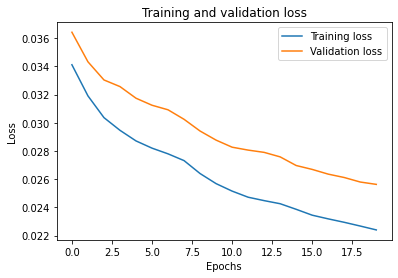

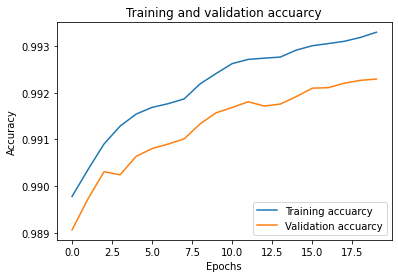

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot_history(network_history):
    plt.figure()
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.plot(network_history.history['loss'], label='Training loss')
    plt.plot(network_history.history['val_loss'], label='Validation loss')
    plt.legend()
    plt.title('Training and validation loss')
    

    plt.figure()
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.plot(network_history.history['acc'], label='Training accuarcy')
    plt.plot(network_history.history['val_acc'], label='Validation accuarcy')
    plt.legend( loc='lower right')
    plt.title('Training and validation accuarcy')
    plt.show()

plot_history(att2)

In [57]:
import pyecharts.options as opts
from pyecharts.charts import Line
c = (        
    Line()       
    .add_xaxis([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20])     
    .add_yaxis("loss",BiGRU_history.history['loss'], is_smooth=True, areastyle_opts=opts.AreaStyleOpts(opacity=0.5),
              markpoint_opts=opts.MarkPointOpts(data=[opts.MarkPointItem(type_="max"),opts.MarkPointItem(type_="min")]),  #点出来
         )       
    .add_yaxis("accuarcy",BiGRU_history.history['acc'], is_smooth=True, areastyle_opts=opts.AreaStyleOpts(opacity=0.5),is_symbol_show=False,
              markpoint_opts=opts.MarkPointOpts(data=[opts.MarkPointItem(type_="min"),opts.MarkPointItem(type_="max")]),  #点出来
         )        
    .set_global_opts(title_opts=opts.TitleOpts(title="BiGRU_history"))    
)

c.render_notebook()

C:\Users\jojo\anaconda3\envs\your_env_name\lib\site-packages\pyecharts\charts\chart.py:14: PendingDeprecationWarning: pyecharts 所有图表类型将在 v1.9.0 版本开始强制使用 ChartItem 进行数据项配置 :)
  super().__init__(init_opts=init_opts)


# 6、测试与检验

In [25]:
print(model.predict(X_test_tokenized[:1]))

[[[7.86209057e-07 9.76780370e-07 1.20981771e-03 ... 5.69924386e-03
   4.14206646e-02 5.38108907e-07]
  [1.13918541e-10 1.90582355e-10 1.49025675e-06 ... 8.56595725e-05
   3.54829081e-03 4.55332327e-10]
  [8.23291695e-12 4.37434845e-11 2.12401541e-09 ... 4.21064626e-03
   4.37797826e-06 2.11769887e-07]
  ...
  [1.29847663e-07 1.77626006e-07 1.10353678e-04 ... 1.59663300e-03
   2.33148858e-02 4.22922966e-07]
  [1.29847663e-07 1.77626006e-07 1.10353678e-04 ... 1.59663300e-03
   2.33148858e-02 4.22922966e-07]
  [1.29847422e-07 1.77626006e-07 1.10353576e-04 ... 1.59663218e-03
   2.33148746e-02 4.22922170e-07]]]


In [26]:
print(y_test_index_padded[:1])

[[[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]]


In [27]:
print(model.predict(X_test_tokenized[2:3]))

[[[1.13102112e-16 2.08415832e-16 4.50650139e-09 ... 6.19673017e-07
   9.95569394e-07 1.02205071e-14]
  [2.19632980e-07 6.09879294e-07 1.05608546e-03 ... 7.32004584e-04
   6.74455389e-02 2.43706268e-07]
  [3.03420102e-11 7.46342640e-11 1.24274777e-06 ... 3.36084922e-05
   5.20084985e-03 1.16109553e-10]
  ...
  [1.29847791e-07 1.77626006e-07 1.10353678e-04 ... 1.59663300e-03
   2.33148858e-02 4.22922966e-07]
  [1.29847663e-07 1.77626006e-07 1.10353678e-04 ... 1.59663300e-03
   2.33148858e-02 4.22922966e-07]
  [1.29847663e-07 1.77626006e-07 1.10353576e-04 ... 1.59663218e-03
   2.33148746e-02 4.22922170e-07]]]


In [28]:
print(y_test_index_padded[2:3])

[[[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]]


# 7、模型的储存与加载

In [32]:
# 模型的存储
pm = "./cixing_model.h5"
model.save(pm)
print("Model saved!")

Model saved!


In [35]:
# 加载存储的模型开始预测
from keras.models import load_model

print("Loading model...")
load_model = load_model("./cixing_model.h5")

# 使用测试集中的第一条开始预测
print("Using loaded model to predict...")
predicted = load_model.predict(X_test_tokenized[:1])

# 呈现预测结果
print("预测结果为：\n", predicted[0][0])

Loading model...
Using loaded model to predict...
预测结果为：
 [4.04630300e-05 1.16919955e-06 7.85740256e-01 1.62828553e-06
 5.10407153e-05 7.18984347e-06 3.44756677e-06 1.25117496e-01
 2.09058067e-04 6.97166570e-06 9.69335204e-04 7.97817734e-07
 3.54493549e-03 1.18479504e-04 1.05112523e-03 2.56112020e-04
 8.77654384e-06 1.40340069e-06 2.59451587e-02 1.45456170e-05
 8.80271837e-05 5.80040137e-07 8.32478472e-05 1.08266051e-03
 7.69139209e-04 1.69123829e-04 7.66462600e-03 1.37587544e-03
 2.79088417e-04 3.96143682e-02 2.69746437e-04 2.65271274e-06
 3.48273921e-09 1.16690656e-03 6.85484395e-07 9.11407128e-08
 4.34363168e-03]


In [33]:
print(y_test_index_padded[0][0])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
